# Homework 5 - Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PART 1: The Labeled Faces in the Wild Dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load the Labeled Faces in the Wild (LFW) people dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X.shape

(1288, 1850)

There are 1288 images, and each image has 1850 features. This is because each image is 50x37 pixels, and each feature simply represents one pixel's intensity.

(-0.5, 36.5, 49.5, -0.5)

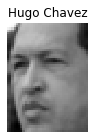

In [4]:
plt.figure(figsize=(2,2))
some_face = X[0]
some_face_image = some_face.reshape(50,37)
plt.imshow(some_face_image,cmap='gray')
plt.title(target_names[y[0]])
plt.axis('off')

The labels are:

    0: Ariel Sharon    
    1: Colin Powell       
    2: Donald Rumsfeld      
    3: George W Bush       
    4: Gerhard Schroeder      
    5: Hugo Chavez      
    6: Tony Blair  

The following figure shows a few more images from the lfw dataset

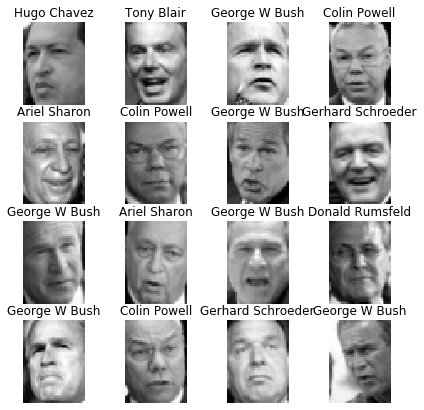

In [14]:
plt.figure(figsize=(7,7))
for i in range(16):
    face = X[i]
    face_image = face.reshape(50,37)
    plt.subplot(4,4,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.title(target_names[y[i]])
    plt.axis('off')    

## Assignments

1. Split the dataset into training, validation and test sets


In [15]:
X_train,y_train = X[:800],y[:800]
X_val,y_val = X[800:1000],y[800:1000]
X_test,y_test = X[1000:],y[1000:]
len(y_train),len(y_val),len(y_test)

(800, 200, 288)

#### knn classifier

2. Pick your favourite multiclass classifier (softmax, knn-classifier, svd-classifier, etc)

In [16]:
'knn classifier'
from collections import Counter
def majority_vote(labels) :
    
    """Assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels) #count votes
    winner,winner_count = vote_counts.most_common(1)[0] 
    num_winners = sum(np.array(list(vote_counts.values()))==winner_count)
    #num_winners = len([1 for count in vote_counts.values() if count == winner_count]) # number of winners
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1]) #try again without the farthest

def knn_classifier(k,points,labels,new_point):
    'knn_classifier classifies new_point'
    
    #order the labeled points from nearest to farthest
    distances = np.linalg.norm(points-new_point, axis=1)
    idx = np.argsort(distances) #Returns the indices that would sort distances. 
    return majority_vote(labels[idx[0:k]])

3. Use the training set to train the classifier: the knn classifier does not need to be trained.

4. Use the validation set to tune-in the parameters of the classifier

In [17]:
'classify the validation set using different values for k'
n_k = 30 
pct_incorrect = np.zeros((n_k,1))
k_list = [k+1 for k in range(n_k)] 
for k in k_list: #k = 1,2,...,n_k
    'classify validation set'
    y_val_predicted = [] #initialize y_val_predicted
    for i in range(len(y_val)):
        new_point = X_val[i,:]
        y_val_predicted.append(knn_classifier(k, X_train, y_train, new_point))
        
    'percentage of incorrect classifications'
    num_incorrect = sum(y_val != y_val_predicted)
    pct_incorrect[k-1] = 100*num_incorrect/len(y_val)

Text(0.5, 1.0, 'Percentage of incorrect classifications')

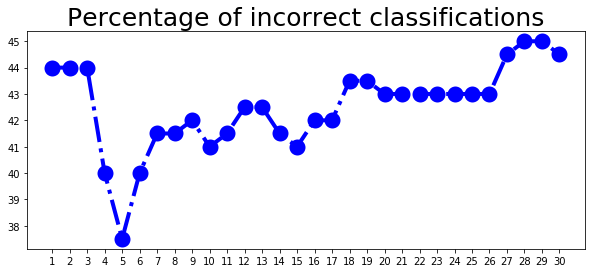

In [18]:
plt.figure(figsize=(10,4))
plt.plot(k_list, pct_incorrect,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Percentage of incorrect classifications',fontsize=25)

In [19]:
k_optimal = 5 #from the above plot

5. Test your classifier on the test set

In [33]:
'initialize y_test_predicted as an empty list'
y_test_predicted = []

'use knn classifier to classify the test set'
for i in range(len(y_test)):
    new_point = X_test[i,:]
    y_test_predicted.append(knn_classifier(k_optimal, X_train, y_train, new_point))
y_test_predicted = np.array(y_test_predicted)

In [34]:
'confusion matrix'
C = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        C[i,j] = sum(y_test_predicted[y_test==i]==j)
C

array([[ 3.,  6.,  0.,  5.,  0.,  0.,  0.],
       [ 0., 41.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  4.,  8.,  8.,  1.,  0.,  0.],
       [ 0., 11.,  2., 96.,  1.,  3.,  2.],
       [ 0.,  3.,  0., 14.,  4.,  2.,  6.],
       [ 0.,  2.,  0., 10.,  1.,  5.,  1.],
       [ 0.,  7.,  1., 18.,  1.,  0., 10.]])

In [35]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_predicted)
100*num_correct/len(y_test)

57.986111111111114

#### svd classifier

2. Pick your favourite multiclass classifier (softmax, knn-classifier, svd-classifier, etc)

In [20]:
'split X_train into X0,X1,...,X6'
X_list = [] #[X0,X1,...,X6]
for i in range(7):
    X_list.append(X_train[y_train==i])

3. Use the training set to train the classifier

In [21]:
'Compute the SVD of each Xi matrix'
V_list = []
for i in range(7):
    U,D,V = np.linalg.svd(X_list[i])
    V_list.append(V)

4. Use the validation set to tune-in the parameters of the classifier

In [22]:
'classify the validation set using different values for k'
n_k = 50
pct_incorrect = np.zeros((n_k,1))
k_list = [k+1 for k in range(n_k)]

for k in k_list: #k = 1,2,...,n_k
    'first k rows of the V matrices'
    Vk_list = []
    for i in range(7):
        Vk_list.append(V_list[i][:k])
    
    y_val_predicted = [] #initialize y_val_predicted
    'classify validation set'
    for j in range(len(y_val)):
        unknown_image = X_val[j,:]
        distances = np.zeros(7)
        'compute distances'
        for i in range(7):
            orth = unknown_image - unknown_image@Vk_list[i].T@Vk_list[i]
            distances[i] = np.linalg.norm(orth)            
        y_val_predicted.append(np.argmin(distances))     
    'percentage of incorrect classifications'
    num_incorrect = sum(y_val != y_val_predicted)
    pct_incorrect[k-1] = 100*num_incorrect/len(y_val)

Text(0.5, 1.0, 'Percentage of incorrect classifications')

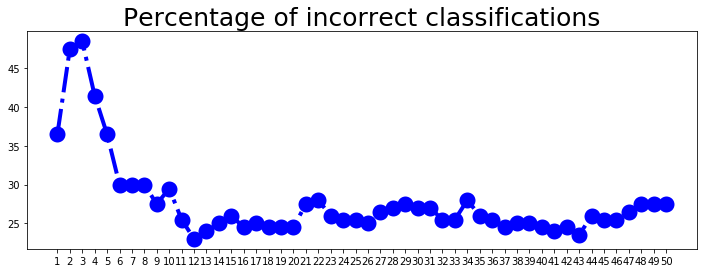

In [24]:
plt.figure(figsize=(12,4))
plt.plot(k_list,pct_incorrect,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Percentage of incorrect classifications',fontsize=25)

In [ ]:
k_optimal = 12 # from the above plot

5. Test your classifier on the test set

In [61]:
'first k_optimal rows of the V matrices'
Vk_list = []
for i in range(7):
    Vk_list.append(V_list[i][:k_optimal])
    
y_test_predicted = [] #initialize y_val_predicted
'classify test set'
for j in range(len(y_test)):
    unknown_image = X_test[j,:]
    distances = np.zeros(7)
    'compute distances'
    for i in range(7):
        orth = unknown_image - unknown_image@Vk_list[i].T@Vk_list[i]
        distances[i] = np.linalg.norm(orth)            
    y_test_predicted.append(np.argmin(distances))
y_test_predicted = np.array(y_test_predicted)

In [64]:
'confusion matrix'
C = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        C[i,j] = sum(y_test_predicted[y_test==i]==j)
C

array([[ 8.,  4.,  0.,  2.,  0.,  0.,  0.],
       [ 2., 46.,  0.,  4.,  0.,  0.,  1.],
       [ 0.,  3., 14.,  3.,  0.,  0.,  1.],
       [ 0.,  5.,  2., 97.,  6.,  0.,  5.],
       [ 0.,  3.,  2.,  5., 13.,  0.,  6.],
       [ 0.,  2.,  0.,  6.,  1.,  8.,  2.],
       [ 0.,  3.,  3.,  7.,  1.,  0., 23.]])

In [65]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_predicted)
100*num_correct/len(y_test)

72.56944444444444

#### Softmax classifier

In [25]:
'scale the dataset so that all the entries of X_train,X_val,X_test are between -1 and 1'
X_train_scaled = X_train/255 
X_val_scaled = X_val/255
X_test_scaled = X_test/255

2. Pick your favourite multiclass classifier (softmax, knn-classifier, svd-classifier, etc)

In [26]:
def softmax(X,theta):
    m,n = X.shape
    _,k = theta.shape
    Y = np.exp(X@theta)
    d = np.linalg.norm(Y,ord=1,axis=1) # with ord=1, it computes 1-norm
    return np.diag(1/d)@Y

In [27]:
def cost_softmax(X,theta,Y):
    m,n = X.shape
    _,k = theta.shape
    cost = 0
    Yhat = softmax(X,theta)
    for i in range(m):
        for j in range(k):
            cost = cost + Y[i,j]*np.log(Yhat[i,j])
    # alternative formula: cost = np.trace(Y.T@np.log(Yhat))
    return (-1/m)*cost

In [28]:
def softmax_regression_GD(X,Y,s,n_iterations):
    m,n = X.shape
    _,k = Y.shape
    theta = np.random.randn(n,k)
    E = np.zeros((n_iterations,1))
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(softmax(X,theta)-Y)
        theta = theta - s * gradient
        E[i] = cost_softmax(X,theta,Y)
    return E,theta

3. Use the training set to train the classifier

In [29]:
Y_train = np.zeros((len(y_train),7))
for i in range(7):
    Y_train[y_train==i,i]=1

In [31]:
s = 0.01
n_iterations = 20000
E, theta = softmax_regression_GD(X_train_scaled,Y_train,s,n_iterations)

Text(0.5, 1.0, 'Convergence of Gradient Descent')

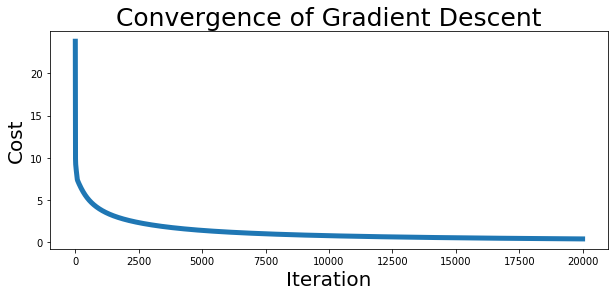

In [35]:
plt.figure(figsize = (10,4))
plt.plot(E,linewidth=5)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)
plt.title('Convergence of Gradient Descent',fontsize=25)

4. Use the validation set to tune-in the parameters of the classifier: no parameters for softmax
5. Test your classifier on the test set

In [135]:
def softmax_classifier(X,theta):
    P = softmax(X,theta)
    return np.argmax(np.round(P,2),axis=1)

In [163]:
y_test_predicted = softmax_classifier(X_test_scaled,theta)

In [164]:
'confusion matrix'
C = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        C[i,j] = sum(y_test_predicted[y_test==i]==j)
C

array([[  5.,   4.,   2.,   2.,   1.,   0.,   0.],
       [  5.,  37.,   3.,   5.,   2.,   1.,   0.],
       [  3.,   1.,  15.,   2.,   0.,   0.,   0.],
       [  2.,   4.,   2., 100.,   5.,   0.,   2.],
       [  1.,   2.,   1.,   3.,  17.,   3.,   2.],
       [  0.,   4.,   0.,   4.,   1.,  10.,   0.],
       [  0.,   2.,   2.,   6.,   4.,   1.,  22.]])

In [165]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_predicted)
100*num_correct/len(y_test)

71.52777777777777

# Part 2: The Titanic Dataset

The goal is to train a logistic regression model that predicts which passengers survived the Titanic shipwreck.

In [36]:
import pandas as pd

In [37]:
'load the Titanic dataset'
url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/train_titanic.csv'
data_train = pd.read_csv(url,index_col=0)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived - 0 = No; 1 = Yes

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

-----------------------------------------------------------------------------------

Before training the model, let's do some feature engineering

The features **ticket** and **cabin** have many missing values. We will drop them from the dataframe.

In [38]:
data_train = data_train.drop(['Ticket','Cabin'], axis=1) 
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Convert ‘Sex’ feature into numeric.

In [39]:
genders = {"male": 0, "female": 1}
data_train['Sex'] = data_train['Sex'].map(genders)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


Convert ‘Embarked’ feature into numeric

In [40]:
ports = {"S": 0, "C": 1, "Q": 2}
data_train['Embarked'] = data_train['Embarked'].map(ports)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0


Combine the SibSp and Parch features

In [41]:
data_train['relatives'] = data_train['SibSp'] + data_train['Parch']
data_train.loc[data_train['relatives'] > 0, 'not_alone'] = 0
data_train.loc[data_train['relatives'] == 0, 'not_alone'] = 1
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,1,0.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,1,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,0,1.0


Add the Fare per Person feature

In [42]:
data_train['Fare Per Person'] = data_train['Fare']/(data_train['relatives']+1)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Fare Per Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,1,0.0,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,1,0.0,35.64165
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,0,1.0,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,1,0.0,26.55000
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,0,1.0,8.05000


## Assignments

1. Use the dataframe data_train to train a logistic regression model that predicts which passengers survived the Titanic.

In [43]:
'drop rows with missing data'
data_train = data_train.dropna()

In [44]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare Per Person','Embarked','relatives','not_alone']
X_train = data_train[features].to_numpy()
y_train = data_train['Survived'].to_numpy()[:,None]

In [45]:
'scale X_train'
means = np.mean(X_train,axis=0)
stds = np.std(X_train,axis=0)
X_train_scaled = (X_train-means)/stds

In [46]:
'logistic regression functions:'

'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))

'cost function'
def cost(y,X,theta):
    m = len(y)
    return -1/m*(y.T@np.log(sigmoid(X@theta))+(1-y).T@np.log(1-sigmoid(X@theta)))

'Logistic regression with Gradient Descent'
def log_regression_GD(X,y,s,n_iterations):
    m,n = X.shape
    theta = np.random.randn(n,1)
    E = np.zeros((n_iterations,1))
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(sigmoid(X@theta)-y) # compute gradient
        theta = theta - s*gradient # Gradient Descent Step
        E[i] = cost(y,X,theta) # compute the cost function
    return E,theta

In [47]:
'train the logistic regression model'
s = 1
n_iterations = 100
E, theta = log_regression_GD(X_train_scaled,y_train,s,n_iterations)

Text(0.5, 1.0, 'Convergence of Gradient Descent')

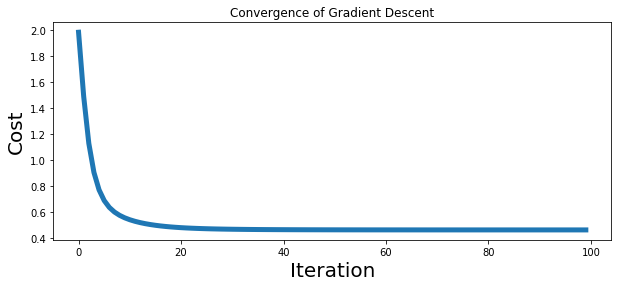

In [48]:
'check convergence of Gradient Descent'
plt.figure(figsize = (10,4))
plt.plot(E,linewidth=5)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)
plt.title('Convergence of Gradient Descent')

2. Load the data_test dataframe

In [226]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/test_titanic.csv'
data_test = pd.read_csv(url,index_col=0)
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


3. Use your logistic regression model to predict whether the other 418 passengers on board (found in data_test) survived.

In [227]:
data_test['Sex'] = data_test['Sex'].map(genders)
data_test['Embarked'] = data_test['Embarked'].map(ports)
data_test['relatives'] = data_test['SibSp'] + data_test['Parch']
data_test.loc[data_test['relatives'] > 0, 'not_alone'] = 0
data_test.loc[data_test['relatives'] == 0, 'not_alone'] = 1
data_test['Fare Per Person'] = data_test['Fare']/(data_test['relatives']+1)
data_test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Fare Per Person
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0,1.0,7.829200
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1,0.0,3.500000
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0,1.0,9.687500
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1.0,8.662500
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2,0.0,4.095833


In [230]:
'drop rows with missing data'
data_test = data_test.dropna()

In [234]:
X_test = data_test[features].to_numpy()
X_test_scaled = (X_test-means)/stds

In [244]:
'make predictions'
y_test_predicted = sigmoid(X_test@theta)
y_test_predicted[y_test_predicted>=0.5]=1
y_test_predicted[y_test_predicted<0.5] = 0
data_test['Survided'] = y_test_predicted.astype('int') # add new column to data_test

In [249]:
data_test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Fare Per Person,Survided
PassengerId,,,,,,,,,,,,,,
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,0,1,0.0,41.13335,1
906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,0,1,0.0,30.58750,0
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1,4,0.0,52.47500,0
918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,1,1,0.0,30.98960,0
920,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,0,0,1.0,30.50000,0


# Part 3: A Face Detector

We are going to build a simple facial detection algorithm

In [49]:
from skimage import data, color, feature
import skimage.data

Instead of using pixel intensities as features (as you did in Part 1), we'll use the HOG (Histrogram of Oriented Gradients) features.
HOG features focus on the structure or the shape of an object, and they are widely used in computer vision tasks for object detection.

Wikipedia has a reasonably good entry on HOG: https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients

Text(0.5, 1.0, 'visualization of HOG features')

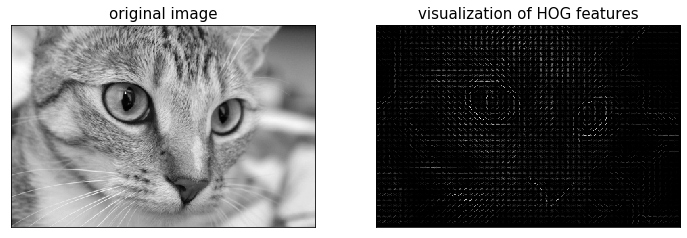

In [50]:
'visualization of HOG features'

image = color.rgb2gray(data.chelsea()) #load an image
hog_vec, hog_vis = feature.hog(image,visualize=True) #extract HOG features

'plot image and hog features'
fig, ax = plt.subplots(1,2, figsize = (12,6),
                       subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('original image',fontsize=15)

ax[1].imshow(hog_vis,cmap = 'gray')
ax[1].set_title('visualization of HOG features',fontsize=15)

To build our face detector, we need

1. A set of face images

2. A set of nonface images

3. To extract the HOG features from all the images

**Step 1:** Obtain a set of image thumbnails of faces to constitute positive training samples

In [51]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people() #load the labeled faces in the wild dataset
positive_patches = faces.images

positive_patches.shape

(8211, 62, 47)

This gives us a sample of 8211 face images 

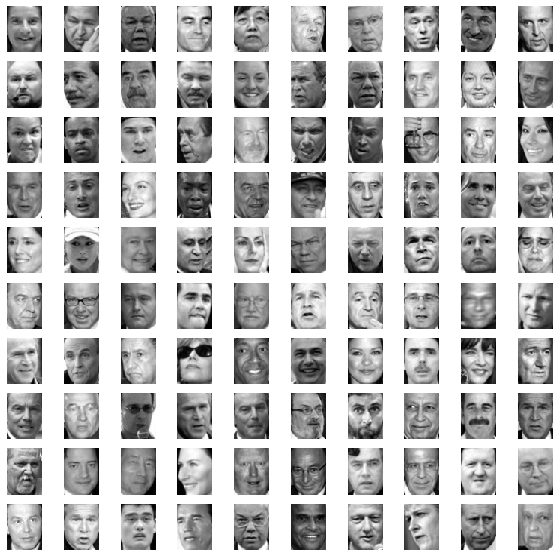

In [52]:
'show the first 100 faces'
plt.figure(figsize=(10,10))
for i in range(100):
    face_image = positive_patches[i]
    plt.subplot(10,10,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.axis('off')

**Step 2:** Obtain a set of negative training samples

In [53]:
from skimage import data, transform

In [54]:
imgs_to_use = ['camera','text','coins','moon','page','clock','immunohistochemistry','chelsea','coffee','hubble_deep_field']
images = [color.rgb2gray(getattr(data,name)()) for name in imgs_to_use]
len(images)

10

We'll extract 62x47 thumbnails from these 10 images

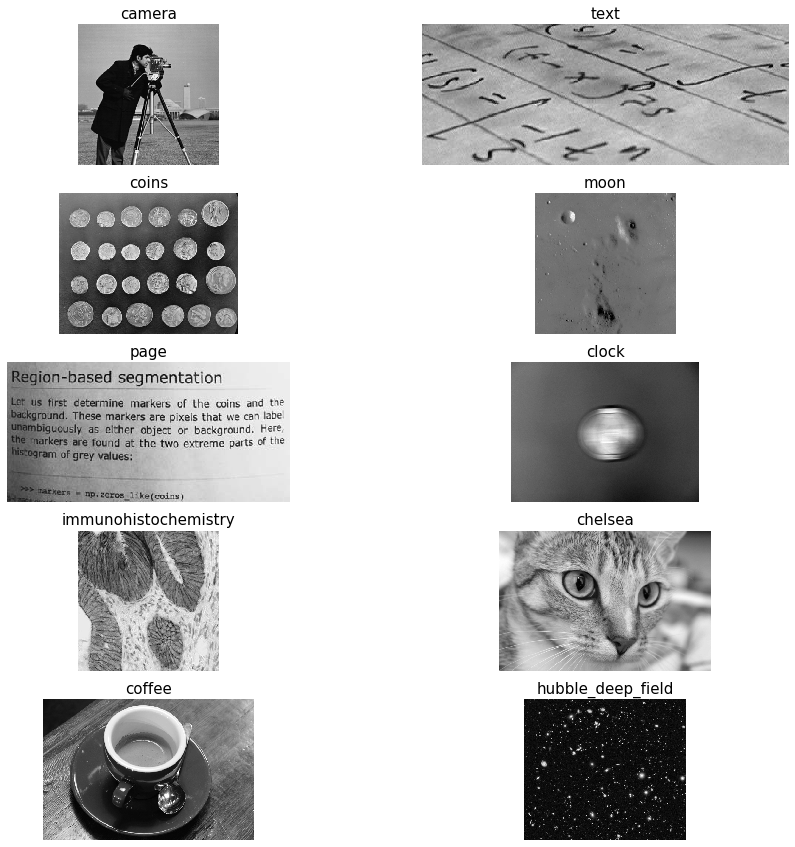

In [55]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(imgs_to_use[i],fontsize=15)
    plt.axis('off')

In [57]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img,N,scale=1.0,patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale*np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N,random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale !=1:
        patches = np.array([transform.resize(patch,patch_size) for patch in patches])
    return patches

In [58]:
negative_patches = np.vstack([extract_patches(im,500,scale) for im in images for scale in [1.0, 2.0]])

In [59]:
negative_patches.shape

(10000, 62, 47)

This gives us a sample of 10000 nonface images

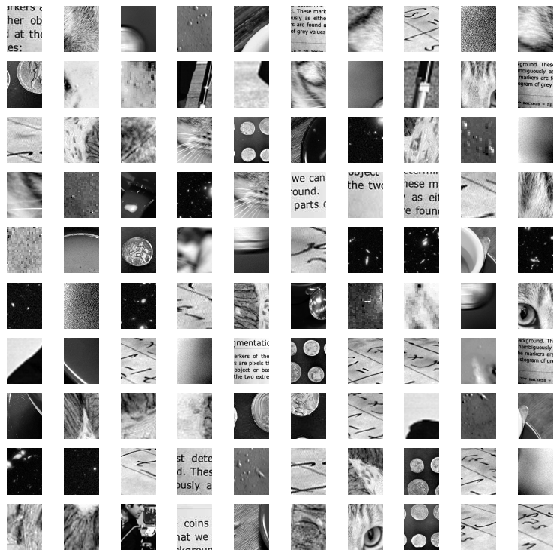

In [60]:
'show 100 (randomly chosen) nonface images'
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(negative_patches[np.random.randint(10000)],cmap='gray')
    plt.axis('off')

**Step 3:** Combine sets and extract HOG features

In [61]:
hog_positive_patches = np.array([feature.hog(img) for img in positive_patches])
hog_negative_patches = np.array([feature.hog(img) for img in negative_patches])

'feature matrix'
X = np.r_[hog_positive_patches, hog_negative_patches]

'label vector'
y = np.zeros(X.shape[0]) # 1 = face; 0 = nonface
y[:positive_patches.shape[0]]=1
y = y[:,None]

## Assignments

1. Using X and y, train a logistic regression model

In [62]:
'train the logistic regression model'
s = 1
n_iterations = 6000
E, theta = log_regression_GD(X,y,s,n_iterations)

Text(0.5, 1.0, 'Convergence of Gradient Descent')

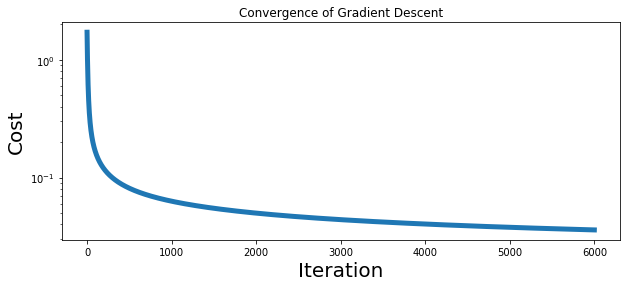

In [63]:
'check convergence of Gradient Descent'
plt.figure(figsize = (10,4))
plt.semilogy(E,linewidth=5)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)
plt.title('Convergence of Gradient Descent')

2. Using the logistic regression model, write a function that classifies an image as a face or as a nonface

In [275]:
def face_classifier(X,theta):
    predictions = sigmoid(X@theta)
    predictions[predictions>=0.5]=1
    predictions[predictions<0.5]=0
    return predictions

**Find faces in a new image:** Now that we have a logistic regression model in place, let's grab a new image and see how the model does. 

(-0.5, 431.5, 575.5, -0.5)

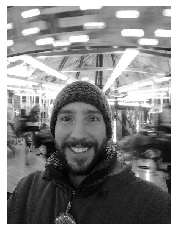

In [271]:
import matplotlib.image as mpimg 
from skimage import io

url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/yourfavouriteprofessor.jpg'
new_image = io.imread(url)

new_image = color.rgb2gray(new_image) #transform image into gray scale
plt.imshow(new_image,cmap='gray')
plt.axis('off')

(-0.5, 131.5, 176.5, -0.5)

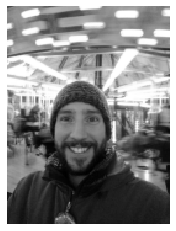

In [272]:
'scale new_image so that the face has size 62x47'
s = 3.25
new_image = skimage.transform.resize(new_image, (new_image.shape[0]//s, new_image.shape[1]//s))
plt.imshow(new_image,cmap='gray')
plt.axis('off')

We will pass a sliding window across the image, using the classifier function to evaluate whether that window contains a face or not.

In [292]:
def sliding_window(img,patch_size=positive_patches[0].shape,
                  istep=2,jstep=2,scale=1.0):
    Ni,Nj = (int(scale*s) for s in patch_size)
    for i in range(0,img.shape[0]-Ni,istep):
        for j in range(0,img.shape[1]-Ni,jstep):
            patch = img[i:i+Ni,j:j+Nj]
            if scale !=1:
                patch - transform.resize(patch,patch_size)
            yield(i,j), patch
            
indices, patches = zip(*sliding_window(new_image)) #apply sliding_window to new_image
patches_hog = np.array([feature.hog(patch) for patch in patches]) #extract HOG features
patches_hog.shape

(2030, 1215)

Finally, we can take the HOG features patches and use the classifier function to evaluate whether each patch contains a face

In [293]:
labels = face_classifier(patches_hog,theta)
labels = labels.flatten()

In [294]:
'number of face detections'
labels.sum()

51.0

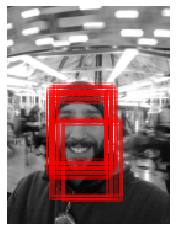

In [295]:
'draw a red rectangle where the classifier function has found a face'
fig, ax = plt.subplots()
ax.imshow(new_image,cmap='gray')
ax.axis('off')

Ni,Nj = positive_patches[0].shape
indices = np.array(indices)
for i,j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j,i), Nj,Ni,edgecolor='red',alpha=0.3,lw=2,facecolor='none'))